In [141]:

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
train_df = pd.read_csv('train.csv',header=0)
test_df = pd.read_csv('test.csv',header=0)
combine = [train_df, test_df]


In [3]:
print("columns in training set are : ",train_df.columns.values)

columns in training set are :  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
# describing how many Pclass = 3 (lower-class) passengers survived
train_df1 = train_df[train_df['Pclass'] ==3]
train_df1 = train_df1[train_df1['Survived']==1]
train_df1.count()

PassengerId    119
Survived       119
Pclass         119
Name           119
Sex            119
Age             85
SibSp          119
Parch          119
Ticket         119
Fare           119
Cabin            6
Embarked       119
dtype: int64

In [7]:
#summery stastics for the categorical variable 
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allum, Mr. Owen George",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [8]:
# observing correlation among Pclass and survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False )

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


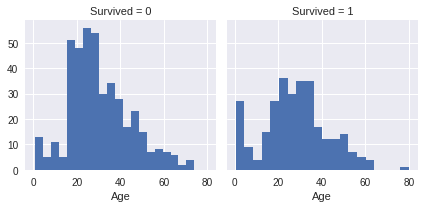

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

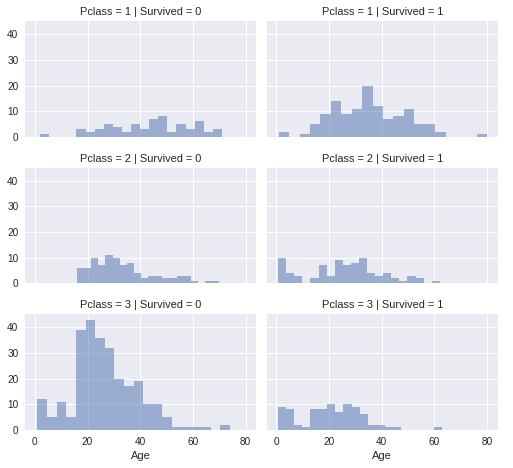

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [14]:
# we will see how many passenger has survived or death using crosstab
pd_cross = pd.crosstab(train_df['Pclass'],train_df['Survived'])
pd_cross

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


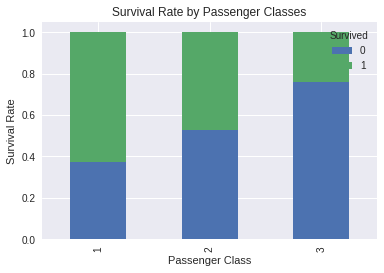

In [15]:
pclass_pct = pd_cross.div(pd_cross.sum(1).astype(float), axis=0)

pclass_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [16]:
#Generate a mapping of Sex from a string to a number representation:
sexes = sorted(train_df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [17]:
# Transforming sex from categorical to numerical
train_df['sex_value'] = train_df['Sex'].map(genders_mapping).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


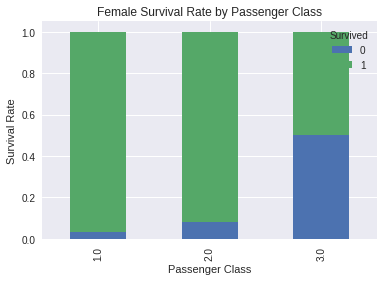

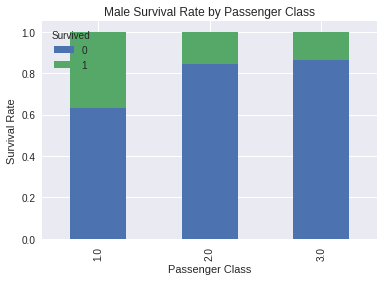

In [18]:
#Plot survival rate by Sex
females_df = train_df[train_df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], train_df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = train_df[train_df['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'],train_df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [19]:
# Embarked Feature
train_df[train_df['Embarked'].isnull()]
# Two Values are missing for Embarked feature 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [20]:
#prepare the Embarked to map string into numric
emb  = train_df['Embarked'].unique()
emb_cnvrt = dict(zip(emb,range(0,len(emb)+1)))
emb_cnvrt

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [79]:
# transforming for fitting in the algorithms
train_df['Embarked_value'] = train_df['Embarked'].map(emb_cnvrt).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,sex_value,Embarked_value,Age_fill,Family_size,Embark_Value_0,Embark_Value_1,Embark_Value_2,Embark_Value_0,Embark_Value_1,Embark_Value_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,22.0,1,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,38.0,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,26.0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,35.0,1,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,35.0,0,1,0,0,1,0,0


In [22]:
# from the observation givien above we can see that the mode [most occuring]  of Embarked variable are "s",so we will replace our null values with the mode "s"
if len(train_df[train_df['Embarked'].isnull()] > 0):
    train_df.replace({'Embarked_value' : 
                   { 3 : emb_cnvrt['S'] 
                   }
               }, 
               inplace=True)
                      
    

In [23]:
# checking that the Embarked_value is changed or not for the Nan value

emb_loc = sorted(train_df['Embarked_value'].unique())
emb_loc

[0, 1, 2]

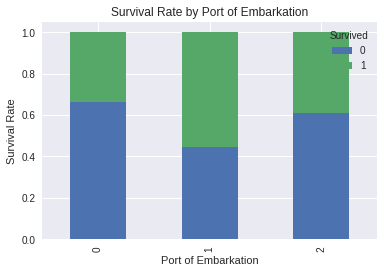

In [24]:
# cross_tab for the Embarked and Survived
embarked_val_xt = pd.crosstab(train_df['Embarked_value'], train_df['Survived'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [25]:
# Feature Age:
train_df[train_df['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


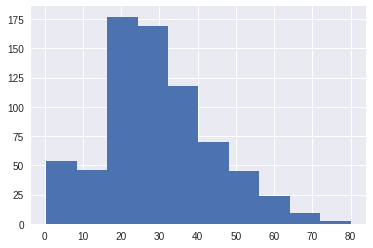

In [26]:
train_df['Age'].hist(bins=10)

In [33]:
# Age histogramme has right skewed so we will replace all null values with median of Age
train_df['Age_fill'] =  train_df['Age'].groupby([train_df['Pclass'],train_df['Sex']]).apply(lambda x : x.fillna(x.median()))
len(train_df[train_df['Age_fill'].isnull()])


0

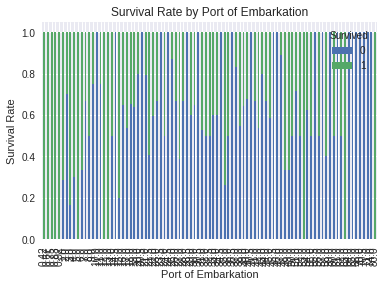

In [35]:
# normalized crosstab curve for Age and survived
age_xt = pd.crosstab(train_df['Age_fill'],train_df['Survived'])
age_xt_plot = age_xt.div(age_xt.sum(1).astype(float), axis=0)
age_xt_plot.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


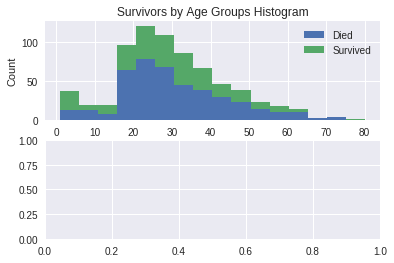

In [44]:
# This bar plot does not showing much useful information so we will plot histogram
# Set up a grid of plots
fig, axes = plt.subplots(2, 1)

# Histogram of AgeFill segmented by Survived
df1 = train_df[train_df['Survived'] == 0]['Age']
df2 = train_df[train_df['Survived'] == 1]['Age']
max_age = max(train_df['Age_fill'])
axes[0].hist([df1, df2], bins=max_age /5, range=(1, max_age), stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

In [47]:
# previous graph does not show much useful infornation so further we will go for another technique
# we will plot Age_fill density with pclass
P_classes = sorted(train_df['Pclass'].unique())
P_classes

[1, 2, 3]

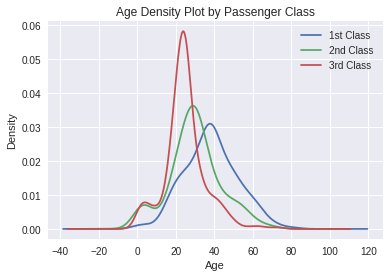

In [48]:
for p in P_classes:
    train_df.Age_fill[train_df.Pclass == p].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')


In [51]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)


/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


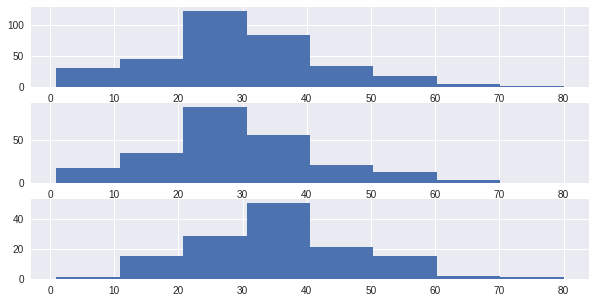

In [61]:
#  Age_fill  histogramm for survived
plt.subplot2grid(fig_dims , (0,0))
survived_df = train_df[train_df['Survived'] == 1]
survived_df['Age_fill'].hist(bins = max_age / bin_size, range = (1, max_age))

# Age_fill histogramme for female survived
plt.subplot2grid(fig_dims,(1,0))
female_survived = train_df[(train_df['sex_value'] == 0) & train_df['Survived'] == 1]
female_survived['Age_fill'].hist(bins = max_age / bin_size, range = (1,max_age))

# Age_fill hostogram for first pclass that has survived
plt.subplot2grid(fig_dims ,(2,0))
pclass_survived = train_df[(train_df['Pclass'] == 1) & (train_df['Survived']==1)]
pclass_survived['Age_fill'].hist(bins = max_age / bin_size , range = (1,max_age))

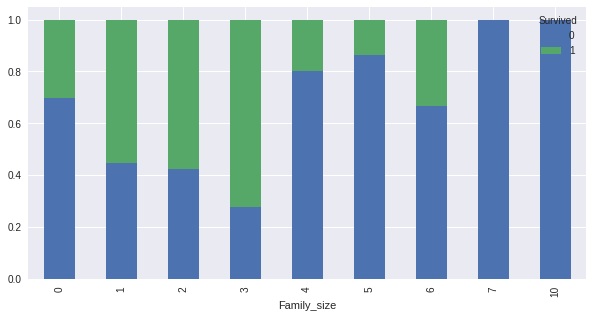

In [66]:

# feature for family size
#  we add both the columns and make family
# Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

# plotting the cross tab for family size and survived
family_cross = pd.crosstab(train_df['Family_size'],train_df['Survived'])
family_cross_xt = family_cross.div(family_cross.sum(1).astype(float), axis = 0)
family_cross_xt.plot(kind ='bar' , stacked = True )
plt.title('Survival Rate family size')
plt.xlabel('family_size')
plt.ylabel('Survival Rate')

In [68]:
train_df[['Family_size','Survived']].groupby(['Family_size'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family_size,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


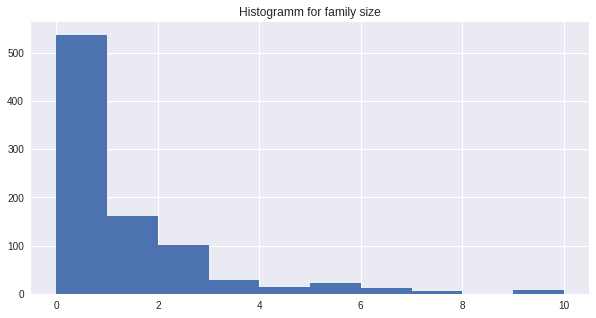

In [69]:
train_df['Family_size'].hist()
plt.title('Histogramm for family size')

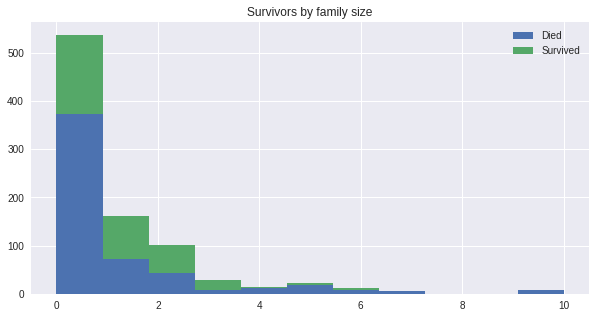

In [71]:
family_sizes = sorted(train_df['Family_size'].unique())
max_family_size = max(family_sizes)

df1 = train_df[train_df['Survived'] == 0]['Family_size']
df2 = train_df[train_df['Survived'] == 1]['Family_size']

plt.hist([df1,df2], bins=max_family_size + 1, range=(0, max_family_size), stacked=True)
plt.title('Survivors by family size')
plt.legend(('Died','Survived') , loc = 'best')

In [88]:

train_df = train_df[['Pclass','Fare','sex_value','Embarked_value','Age_fill','Family_size','Survived']]
train_df.dtypes

Pclass              int64
Fare              float64
sex_value           int64
Embarked_value      int64
Age_fill          float64
Family_size         int64
Survived            int64
dtype: object

In [85]:
# converting data frame to a numpy array
train_data = train_df.values
train_data

array([[  3.    ,   7.25  ,   1.    , ...,  22.    ,   1.    ,   0.    ],
       [  1.    ,  71.2833,   0.    , ...,  38.    ,   1.    ,   1.    ],
       [  3.    ,   7.925 ,   0.    , ...,  26.    ,   0.    ,   1.    ],
       ..., 
       [  3.    ,  23.45  ,   0.    , ...,  21.5   ,   3.    ,   0.    ],
       [  1.    ,  30.    ,   1.    , ...,  26.    ,   0.    ,   1.    ],
       [  3.    ,   7.75  ,   1.    , ...,  32.    ,   0.    ,   0.    ]])

In [126]:
# Fitting the logistic model

logistic = LogisticRegression()
X_train = train_data[:, :-1]
Y_train = train_data[:,-1]

logistic_fit = logistic.fit(X_train,Y_train)
score = logistic_fit.score(X_train, Y_train)
"Mean accuracy of Logistic Regression is : {0}".format(score)

'Mean accuracy of Logistic Regression is : 0.8058361391694725'

In [127]:

# predicting on test data 
len(test_df[test_df['Fare'].isnull()])


0

In [128]:
test_df

,Pclass,Fare,sex_value,Embarked_value,Age_fill,Family_size
0,3,7.8292,1,0,34.500000,0
1,3,7.0000,0,1,47.000000,1
2,2,9.6875,1,0,62.000000,0
3,3,8.6625,1,1,27.000000,0
4,3,12.2875,0,1,22.000000,2
5,3,9.2250,1,1,14.000000,0
6,3,7.6292,0,0,30.000000,0
7,2,29.0000,1,1,26.000000,2
8,3,7.2292,0,2,18.000000,0
9,3,24.1500,1,1,21.000000,2


In [129]:
train_df

,Pclass,Fare,sex_value,Embarked_value,Age_fill,Family_size,Survived
0,3,7.2500,1,0,22.0,1,0
1,1,71.2833,0,1,38.0,1,1
2,3,7.9250,0,0,26.0,0,1
3,1,53.1000,0,0,35.0,1,1
4,3,8.0500,1,0,35.0,0,0
5,3,8.4583,1,2,25.0,0,0
6,1,51.8625,1,0,54.0,0,0
7,3,21.0750,1,0,2.0,4,0
8,3,11.1333,0,0,27.0,2,1
9,2,30.0708,0,1,14.0,1,1


In [131]:
test_data = test_df.values
test_data

array([[  3.        ,   7.8292    ,   1.        ,   0.        ,
         34.5       ,   0.        ],
       [  3.        ,   7.        ,   0.        ,   1.        ,
         47.        ,   1.        ],
       [  2.        ,   9.6875    ,   1.        ,   0.        ,
         62.        ,   0.        ],
       ..., 
       [  3.        ,   7.25      ,   1.        ,   1.        ,
         38.5       ,   0.        ],
       [  3.        ,   8.05      ,   1.        ,   1.        ,
         35.62718849,   0.        ],
       [  3.        ,  22.3583    ,   1.        ,   2.        ,
         35.62718849,   2.        ]])

In [133]:
predict = logistic.predict(test_data)
predict

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [136]:
#  we will evaluate our model accuracy
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.20, random_state=0)
log_fit = logistic.fit(train_x, train_y)
predict_y = log_fit.predict(test_x)
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.81


In [139]:
print(classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.87      0.85       110
    Survived       0.78      0.71      0.74        69

 avg / total       0.81      0.81      0.81       179



[[96 14]
 [20 49]]


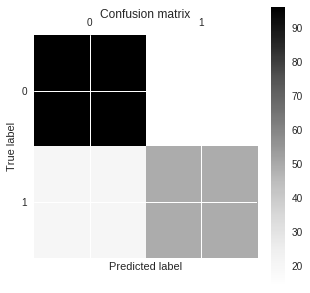

In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, predict_y)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [142]:
precisions = cross_val_score(logistic, train_x, train_y, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(logistic, train_x, train_y, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.785946799071 [ 0.73913043  0.82        0.75510204  0.78571429  0.82978723]
Recalls 0.673939393939 [ 0.61818182  0.74545455  0.67272727  0.61111111  0.72222222]


In [144]:
f1 = cross_val_score(logistic, train_x, train_y, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

F1 0.725107079389 [ 0.67326733  0.78095238  0.71153846  0.6875      0.77227723]
